In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')
pd.set_option('Display.max_rows', None)

In [87]:
df1 = pd.read_csv('/kaggle/input/physicians/Physician.csv').drop(['Unnamed: 0'], axis=1)
# df2 = pd.read_excel('/kaggle/input/physician/Patient_Data_KDAG_Hackathon.xlsx')
# df = pd.read_csv('/kaggle/input/physicians/Physician.csv').drop(['Time_Period', 'Unnamed: 0', 'Market_Rx', 'Speaker_Programs_Attended', 'Vouchers_Dropped'], axis=1)

In [88]:
#DateTime Features
# df1['Time_Period'] = pd.to_datetime(df1['Time_Period'], infer_datetime_format = True)
# df2['Date_of_Visit'] = pd.to_datetime(df2['Date_of_Visit'], infer_datetime_format = True)

## Feature Engineering

### Encoding

In [89]:
df1['Physician_Segment'].replace({'1-High':3, '2-Medium':2, '3-Low':1}, inplace= True)
df1 = pd.concat([df1, pd.get_dummies(df1['Specialty'])], axis=1).drop(['Specialty'], axis=1)
cols = list(df1.columns)
cols.remove('Brand_Rx')
df1 = df1[cols+['Brand_Rx']]

In [90]:
# df[df['Physician_ID'] == 'axt00001']
df1 = df1.drop(['Time_Period', 'Physician_ID'], axis=1)
# df1

In [56]:
# ids = df['Physician_ID'].unique()
# for id in ids[:10]:
#     hcp = df.loc[df['Physician_ID'] == id]
# #     print(hcp)
#     plt.figure()
#     sns.heatmap(hcp.corr(), annot = True)
#     plt.title(id)
#     plt.show()
#     print()

Observations-
1. For Some HCPs, Brand_Rx=0 even some/all of ['Sales_Rep_Calls', 'Samples_Dropped', 'Emails_Delivered'] are done.
2. For some Brand_Rx > 0, even if none of ['Sales_Rep_Calls', 'Samples_Dropped', 'Emails_Delivered'] is done.
3. For some Brand_Rx is negetively correlated with some/all of ['Sales_Rep_Calls', 'Samples_Dropped', 'Emails_Delivered']

### Splitting And Scaling

In [92]:
X = df1.iloc[: :-1]
y = df1.iloc[:, -1]
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
rows = X['Brand_Rx']<1
# X_train = X_train.iloc[rows.values, :]
# y_train = y_train.iloc[rows.values]
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [93]:
#for whole data
X_train = X.iloc[rows.values, :]
y_train = y.iloc[rows.values]

In [80]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [37]:
#combining HCPS and Patients data
# df1 = df1.sort_values(by = ['Physician_ID', 'Time_Period'])
# df2 = df2.sort_values(by = ['Physician_ID', 'Date_of_Visit'])

## Dealing with high bias
If model is too simple:

add more features (ie. better feature engineering),
more sophisticated model
decrease regularization
In XGBoost you can do it by:

increase depth of each tree (max_depth),
decrease min_child_weight parameter,
decrease gamma parameter,
decrease lambda and alpha regularization parameters


In [54]:
# params_grid = {
#     'max_depth': [6, 10],
#     'min_child_weight':[0.2, 0.5],
#     'eta': [0.6,0.8, 1],
#     'learning_rate': np.linspace(1e-16, 1, 3)
# }

In [ ]:
# df1n = df1.copy()
# df1['count'] = 0 
# df1['Age'] = 0
# df1['males'] = 0
# df1['females'] = 0
# for i in range(1, len(df1)):
#     count = 0
#     age = 0
#     males = 0
#     flag=0
#     for j in range(len(df2)):
        
#         if(df1['Physician_ID'].iloc[i] == df2['Physician_ID'].iloc[j] and df1['Time_Period'].iloc[i] >= df2['Date_of_Visit'].iloc[j] and df1['Time_Period'].iloc[i-1] < df2['Date_of_Visit'].iloc[j]):
#             count += 1
#             age += 2022-df2['Year of Birth'].iloc[j]
#             if(df2['Gender'].iloc[j] == 'M'):
#                 males += 1
#             flag=1    
#             print(count)
#         else:
#             if count==0:
#                 df1['Age'].iloc[i] = 0
#             else:
#                 df1['Age'].iloc[i] = age/count
#             df1['males'].iloc[i] = males
#             df1['females'].iloc[i] = count - males
#             if flag:
#                 break
           
#     df1['count'].iloc[i] = count 
#     if i%10000==0:

In [59]:
# from xgboost import XGBRegressor
# # from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import GridSearchCV
# bst_grid = GridSearchCV(
#     estimator=xgb,
#     param_grid=params_grid,
#     cv=5,
#     scoring='neg_mean_squared_error'
# )

### Model Building

In [100]:
from xgboost import XGBRegressor
xgb = XGBRegressor(eta=0.2, max_depth = 15, min_child_weight=0.2)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.2,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.200000003, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=0.2,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

In [ ]:
params_grid = {
    'max_depth': [10, 15],
    'min_child_weight':[0.2, 0.5],
    'eta': [0.6,0.8, 1]
}
from sklearn.metrics import mean_squared_error
xgb = XGBRegressor()
from sklearn.model_selection import GridSearchCV
bst_grid = GridSearchCV(
    estimator=xgb,
    param_grid=params_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose = 30,n_jobs=-1
)

In [ ]:
bst_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
bst_grid.get_params

### Evaluation

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred_train = xgb.predict(X_train)
print('mean_absolute_error')
print(mean_absolute_error(y_pred_train, y_train))
# print(mean_absolute_error(y_pred_test, y_test))
print()
print('mean_squared_error')
print(mean_squared_error(y_pred_train, y_train))
# print(mean_squared_error(y_pred_test, y_test))

mean_absolute_error
0.7992994213954084

mean_squared_error
1.595587574248775


In [ ]:
import pickle as pkl


In [73]:
# from sklearn.linear_model import LinearRegression 

# lr = LinearRegression(normalize = True)
# lr.fit(X_train, y_train)
# y_pred_train, y_pred_test = lr.predict(X_train), lr.predict(X_test)


In [75]:
# from sklearn.preprocessing import PolynomialFeatures
# poly_features = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = poly_features.fit_transform(X_train)

In [79]:
# lr = LinearRegression(normalize = True)
# lr.fit(X_poly, y_train)
# y_pred_train, y_pred_test = lr.predict(X_poly), lr.predict(poly_features.transform(X_test))

In [22]:
# df1.head()

,Physician_ID,Time_Period,Market_Rx,Sales_Rep_Calls,Samples_Dropped,Physician_Segment,Emails_Delivered,Speaker_Programs_Attended,Vouchers_Dropped,Dermatologist,General Physician,Nurse Practitioner,Brand_Rx
0,axt00001,2019-01-04,2.80567,1,0,1,0,0,0,1,0,0,0.0
1,axt00001,2019-01-11,20.57312,1,0,1,0,0,0,1,0,0,0.0
2,axt00001,2019-01-18,6.16010,1,0,1,0,0,0,1,0,0,0.0
3,axt00001,2019-01-25,8.95501,1,5,1,0,0,0,1,0,0,0.0
4,axt00001,2019-02-01,9.13793,1,0,1,0,0,0,1,0,0,0.0


In [23]:
# df1['Market_Rx'].describe()

### Data Analysis

<AxesSubplot:xlabel='Market_Rx'>

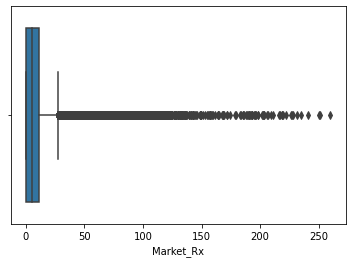

In [93]:
sns.boxplot(df1['Market_Rx'])

<AxesSubplot:xlabel='Emails_Delivered', ylabel='count'>

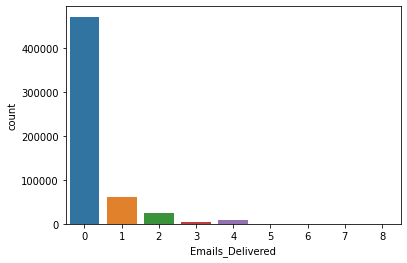

In [97]:
sns.countplot(df1['Emails_Delivered'])

<AxesSubplot:xlabel='Samples_Dropped', ylabel='count'>

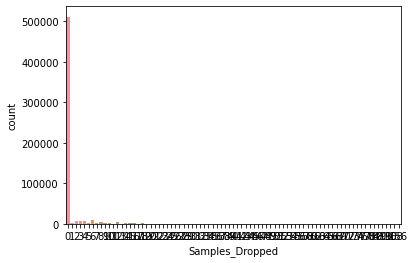

In [98]:
sns.countplot(df1['Samples_Dropped'])

<AxesSubplot:xlabel='Sales_Rep_Calls', ylabel='count'>

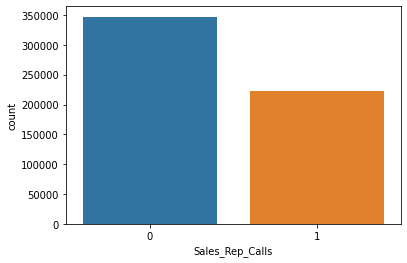

In [99]:
sns.countplot(df1['Sales_Rep_Calls'])

(array([4.77227e+05, 5.02260e+04, 2.36990e+04, 1.00540e+04, 3.94500e+03,
        2.08900e+03, 1.10300e+03, 6.66000e+02, 3.52000e+02, 2.23000e+02,
        1.34000e+02, 9.70000e+01, 5.30000e+01, 3.10000e+01, 1.60000e+01,
        1.50000e+01, 7.00000e+00, 5.00000e+00, 2.00000e+00, 3.00000e+00,
        4.00000e+00, 4.00000e+00, 1.00000e+00, 5.00000e+00, 2.00000e+00,
        0.00000e+00, 4.00000e+00, 3.00000e+00, 4.00000e+00, 4.00000e+00,
        2.00000e+00, 6.00000e+00, 2.00000e+00, 3.00000e+00, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([ 0.    ,  1.2851,  2.5702,  3.8553,  5.1404,  6.4255,  7.7106,
         8.9957, 10.2808, 11.5659, 12.851 , 14.1361, 15.4212, 16.7063,
        17.9914, 19.2765, 20.5616, 21.8467, 23.1318, 24.4169, 25.702 ,
        26.9871, 28.2722, 29.5573, 30.8424, 32.1275, 33

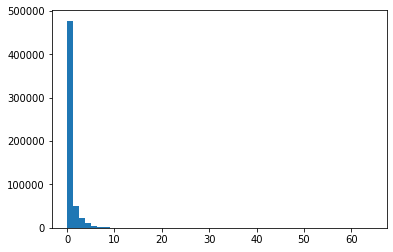

In [20]:
plt.hist(df1['Brand_Rx'], bins=50)

(array([2.94303e+05, 1.20674e+05, 6.61340e+04, 3.62760e+04, 2.03850e+04,
        1.18950e+04, 7.01200e+03, 4.47700e+03, 2.63800e+03, 1.74600e+03,
        1.22500e+03, 8.56000e+02, 5.95000e+02, 4.43000e+02, 3.12000e+02,
        2.13000e+02, 1.58000e+02, 1.25000e+02, 1.11000e+02, 8.70000e+01,
        8.10000e+01, 3.10000e+01, 4.70000e+01, 3.60000e+01, 1.90000e+01,
        2.10000e+01, 1.10000e+01, 1.00000e+01, 8.00000e+00, 4.00000e+00,
        8.00000e+00, 4.00000e+00, 6.00000e+00, 2.00000e+00, 2.00000e+00,
        5.00000e+00, 7.00000e+00, 7.00000e+00, 5.00000e+00, 4.00000e+00,
        2.00000e+00, 2.00000e+00, 4.00000e+00, 3.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([  0.       ,   5.1993396,  10.3986792,  15.5980188,  20.7973584,
         25.996698 ,  31.1960376,  36.3953772,  41.5947168,  46.7940564,
         51.993396 ,  57.1927356,  62.3920752,  67.5914148,  72.7907544,
         77.990094 ,  83.1894336,  88.3887732,  9

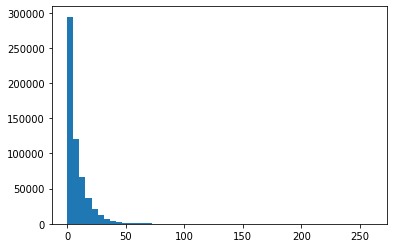

In [21]:
plt.hist(df1['Market_Rx'], bins=50)

In [24]:
# from sklearn.preprocessing import OneHotEncoder
# encoder1hot = OneHotEncoder()
# id  = encoder1hot.fit_transform(df1[['Physician_ID']])
# id

In [25]:

# id = pd.DataFrame.sparse.from_spmatrix(id)
# id.head()
# id.columns = encoder1hot.get_feature_names_out()
# df1.drop(['Physician_ID'], axis=1, inplace=True)
# df1[id.columns] = encoded

### Neural Netwok Model

In [28]:
import tensorflow as tf
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [41]:
model = Sequential([
    Dense(32, activation='relu')
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1)
])
model.compile(loss='mse', optimizer='rmsprop', metrics = ['mae'])

In [55]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=40, # how many epochs to wait before stopping
    restore_best_weights=True,
)
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    batch_size=256,
    epochs=50,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=1,  # turn off training log
)


Epoch 1/50
1230/1230 [==============================] - 5s 4ms/step - loss: 0.1295 - mae: 0.2737 - val_loss: 0.0895 - val_mae: 0.1925
Epoch 2/50
1230/1230 [==============================] - 3s 2ms/step - loss: 0.0900 - mae: 0.1969 - val_loss: 0.0894 - val_mae: 0.1978
Epoch 3/50
1230/1230 [==============================] - 3s 2ms/step - loss: 0.0900 - mae: 0.1968 - val_loss: 0.0895 - val_mae: 0.1987
Epoch 4/50
1230/1230 [==============================] - 3s 2ms/step - loss: 0.0900 - mae: 0.1969 - val_loss: 0.0894 - val_mae: 0.1957
Epoch 5/50
1230/1230 [==============================] - 3s 3ms/step - loss: 0.0900 - mae: 0.1969 - val_loss: 0.0894 - val_mae: 0.1929
Epoch 6/50
1230/1230 [==============================] - 3s 2ms/step - loss: 0.0900 - mae: 0.1968 - val_loss: 0.0894 - val_mae: 0.1959
Epoch 7/50
1230/1230 [==============================] - 3s 2ms/step - loss: 0.0900 - mae: 0.1969 - val_loss: 0.0894 - val_mae: 0.1953
Epoch 8/50
1230/1230 [==============================] - 3s 2ms

In [ ]:
model.best

In [52]:
df_red = df1[df1['Brand_Rx']<1]